# PTML Project Analysis Part 1: Supervised Learning

In [1]:
#Imports for statistics
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv("data.csv")
df

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


## Cleaning Data

In [3]:
droped = ['mfcc']*19
for i in range(19):
    droped[i] += str(i+2)

df = df.drop(columns=droped)
df

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,blues
...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,rock


In [4]:
df.isna().sum()

## Analysis
### Statistics
#### Histograms per variable
In a first time, we are interested in some statistics values such as mean, standard deviation, median, minimum value and maximum value. We will take our quantitative columns and display on each an histogram followed by its statistics values.

In [5]:
df_quant = df.iloc[:,1:10]
df_quant

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568
...,...,...,...,...,...,...,...,...,...
995,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023
996,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791
997,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876
998,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322


In [190]:
df_quant.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587


/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


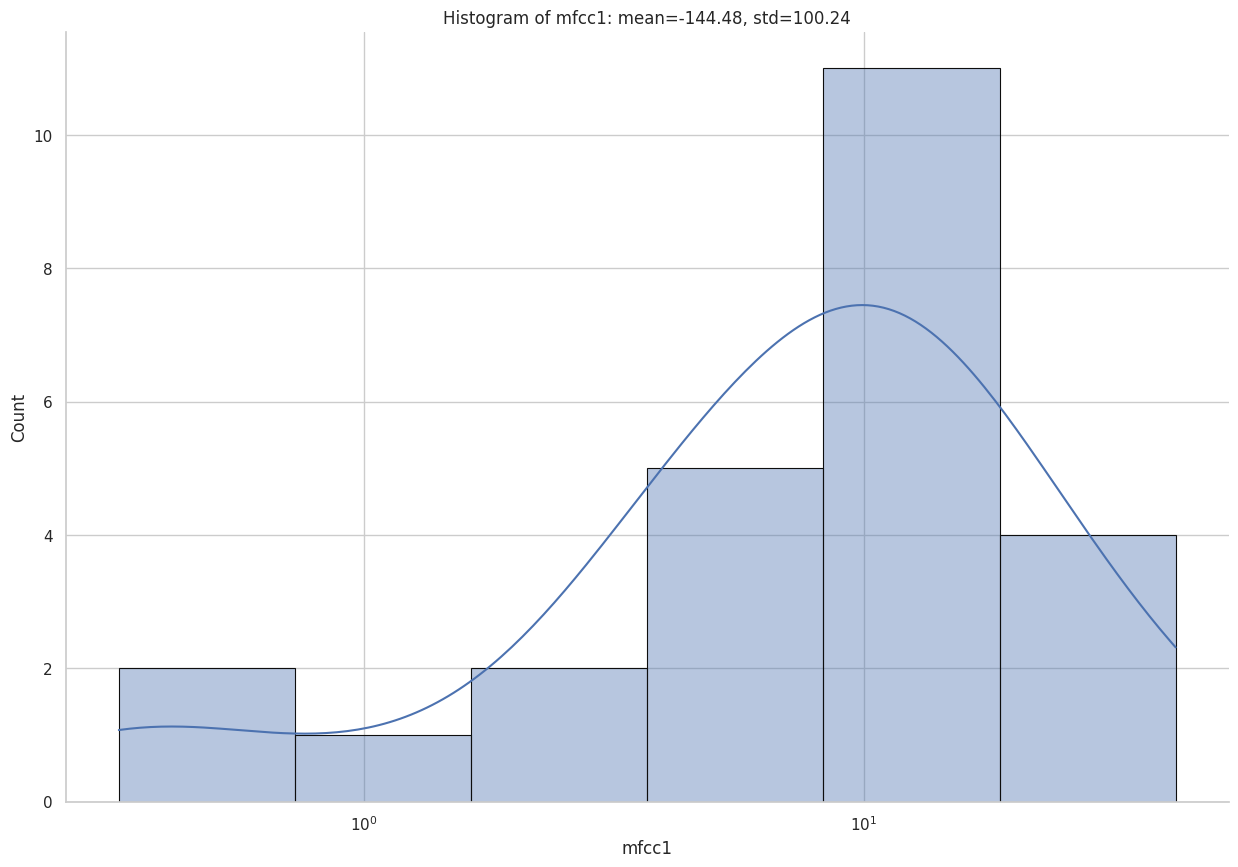

In [191]:
num_bins = 20
sns.set_theme(style='whitegrid')

#Global mini and maxi values for each column
#[[("name",name), ("min",min), ""max",max)],...]
mini_maxi = []

for col in df_quant:
    #Get statistics values
    mini = df_quant[col].min()
    maxi = df_quant[col].max()
    
    #Append to global statistics list
    mini_maxi.append([(str(col),col), ("Mini",mini), ("Maxi",maxi)])

    #Create histogram
    f, ax = plt.subplots(figsize=(15, 10))
    sns.despine(f)
    sns.histplot(
    df_quant,
    x=col,
    kde=True,
    alpha = 0.4,
    palette=sns.color_palette("Paired", as_cmap=True),
    edgecolor="0.05",
    linewidth=.8,
    log_scale=True,
)
    title = "Histogram of " + col + ": mean=" + str(round(mean,2)) + ", std=" + str(round(std,2))
    plt.title(title)
    plt.show()
    

#### Histograms corresponding to music label


For the following histograms, we have this legend :
- Blues = 0
- Classical = 1
- Disco = 2
- Jazz = 3
- Rock = 4
- Pop = 5
- Metal = 6
- Reggae = 7
- Country = 8
- Hiphop = 9

In [7]:
df_stat = df.copy()
df_stat['label'].replace({"blues":0, "classical":1,"disco":2, "jazz":3, "rock":4, "pop":5,"metal":6, "reggae":7, "country":8, "hiphop":9}, inplace=True)
pd.to_numeric(df_stat['label'])
df_stat

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,0
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,0
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,0
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,0
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,0
...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,4
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,4
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,4
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,4


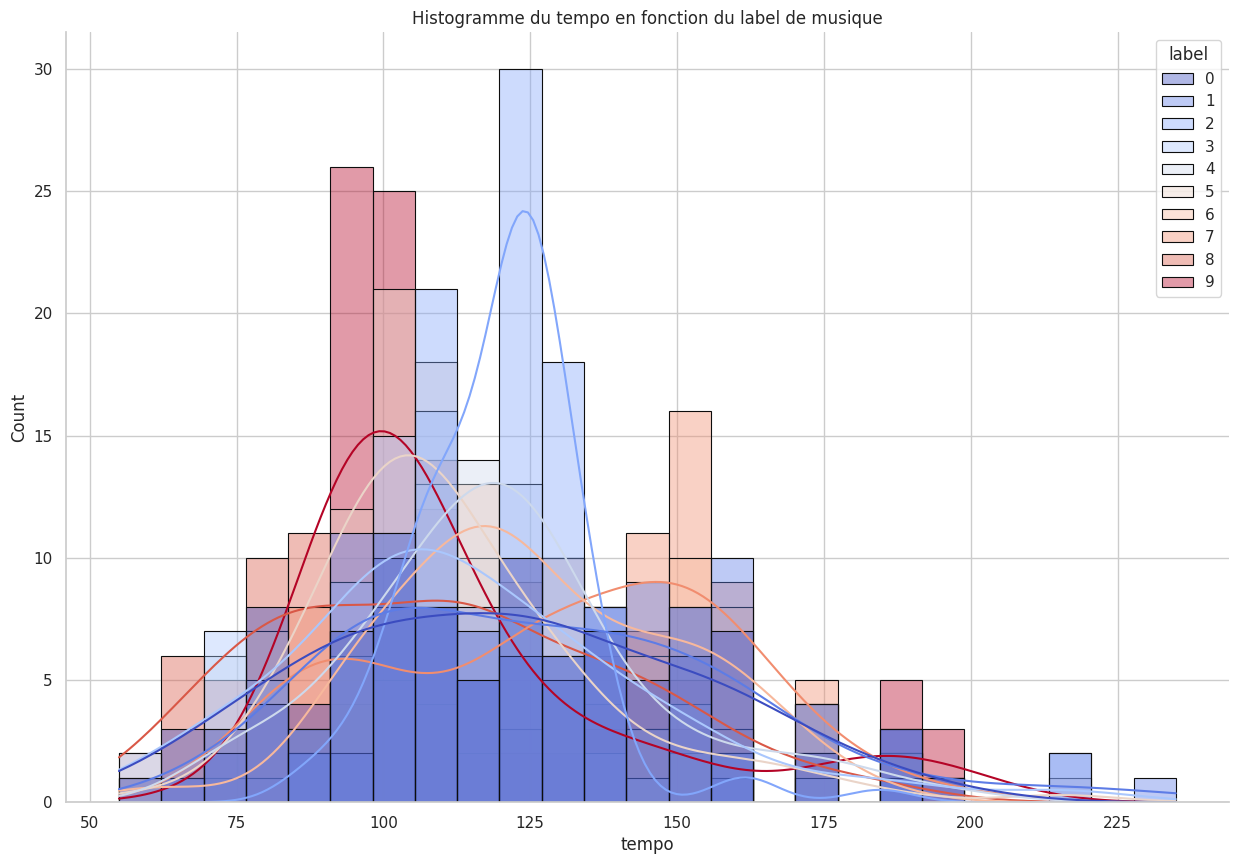

In [8]:
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f)
cm = sns.color_palette('coolwarm', as_cmap=True)
sns.histplot(
    df_stat,
    x="tempo", hue="label",
    kde=True,
    alpha = 0.4,
    palette=cm,
    edgecolor="0.05",
    linewidth=.8,
)
title = "Histogramme du tempo en fonction du label de musique"
plt.title(title)
plt.show()

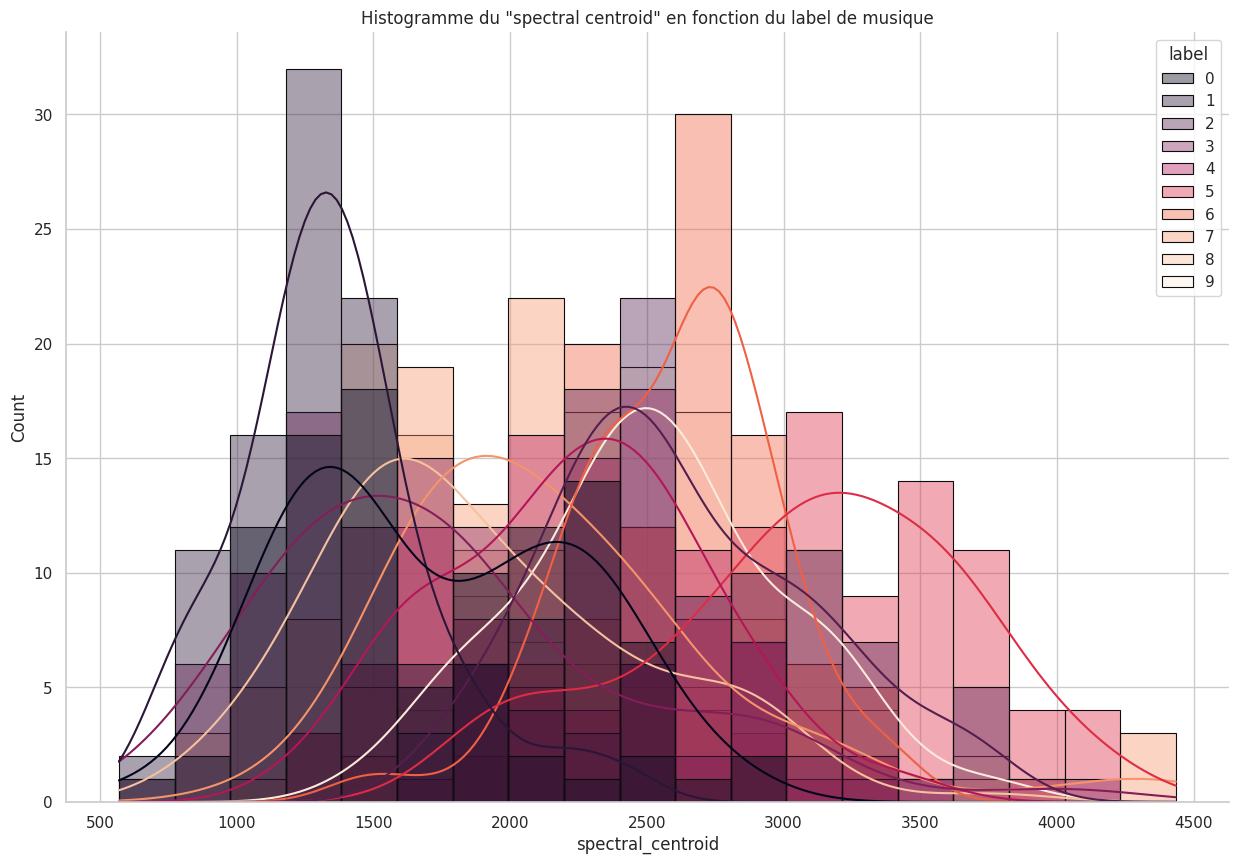

In [9]:
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f)
cm = sns.color_palette('rocket', as_cmap=True)
sns.histplot(
    df_stat,
    x="spectral_centroid", hue="label",
    kde=True,
    alpha = 0.4,
    palette=cm,
    edgecolor="0.05",
    linewidth=.8,
    log_scale=False,
)
title = "Histogramme du \"spectral centroid\" en fonction du label de musique"
plt.title(title)
plt.show()

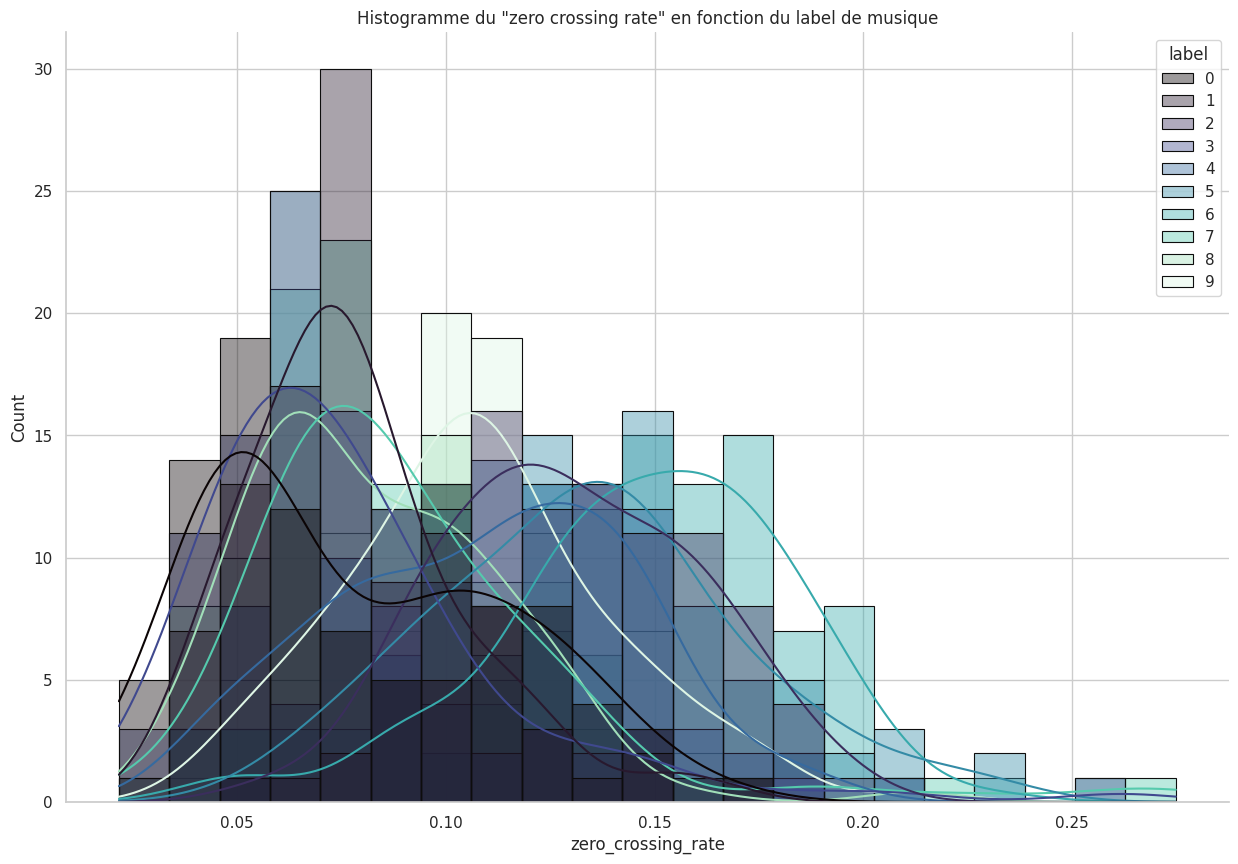

In [10]:
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f)
cm = sns.color_palette('mako', as_cmap=True)
sns.histplot(
    df_stat,
    x="zero_crossing_rate", hue="label",
    kde=True,
    alpha = 0.4,
    palette=cm,
    edgecolor="0.05",
    linewidth=.8,
    log_scale=False,
)
title = "Histogramme du \"zero crossing rate\" en fonction du label de musique"
plt.title(title)
plt.show()

### Link with music
For each colunms, we have now its minimum value and maximum value. It is interesting to know with which type of music these values correspond.

In [11]:
for col in mini_maxi:
    print(col[0][0].capitalize())
    for i in range(1,len(col)):
        s = str(df['label'].loc[df[col[0][1]] == col[i][1]])
        printed = col[i][0] + " value correspond to"
        print(printed, s.split()[1].capitalize())
    print("---------------------")
        

Tempo
Mini value correspond to Jazz
Maxi value correspond to Classical
---------------------
Beats
Mini value correspond to Classical
Maxi value correspond to Classical
---------------------
Chroma_stft
Mini value correspond to Jazz
Maxi value correspond to Reggae
---------------------
Rmse
Mini value correspond to Classical
Maxi value correspond to Pop
---------------------
Spectral_centroid
Mini value correspond to Blues
Maxi value correspond to Reggae
---------------------
Spectral_bandwidth
Mini value correspond to Classical
Maxi value correspond to Pop
---------------------
Rolloff
Mini value correspond to Classical
Maxi value correspond to Pop
---------------------
Zero_crossing_rate
Mini value correspond to Blues
Maxi value correspond to Reggae
---------------------
Mfcc1
Mini value correspond to Classical
Maxi value correspond to Reggae
---------------------


### Correlation
It is also interesting to see the correlation betweenn our variables.

In [12]:
matrix = df.corr()
matrix

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1
tempo,1.000000,0.966179,0.030640,-0.043503,-0.014415,-0.039283,-0.020564,0.019935,0.011271
beats,0.966179,1.000000,0.080684,0.004607,0.035843,0.011287,0.033489,0.056517,0.082156
chroma_stft,0.030640,0.080684,1.000000,0.499577,0.615524,0.517482,0.597910,0.554735,0.659294
rmse,-0.043503,0.004607,0.499577,1.000000,0.509984,0.529768,0.537718,0.332119,0.807260
spectral_centroid,-0.014415,0.035843,0.615524,0.509984,1.000000,0.904438,0.979633,0.874755,0.720831
spectral_bandwidth,-0.039283,0.011287,0.517482,0.529768,0.904438,1.000000,0.956194,0.612325,0.648373
rolloff,-0.020564,0.033489,0.597910,0.537718,0.979633,0.956194,1.000000,0.779809,0.721746
zero_crossing_rate,0.019935,0.056517,0.554735,0.332119,0.874755,0.612325,0.779809,1.000000,0.634139
mfcc1,0.011271,0.082156,0.659294,0.807260,0.720831,0.648373,0.721746,0.634139,1.000000


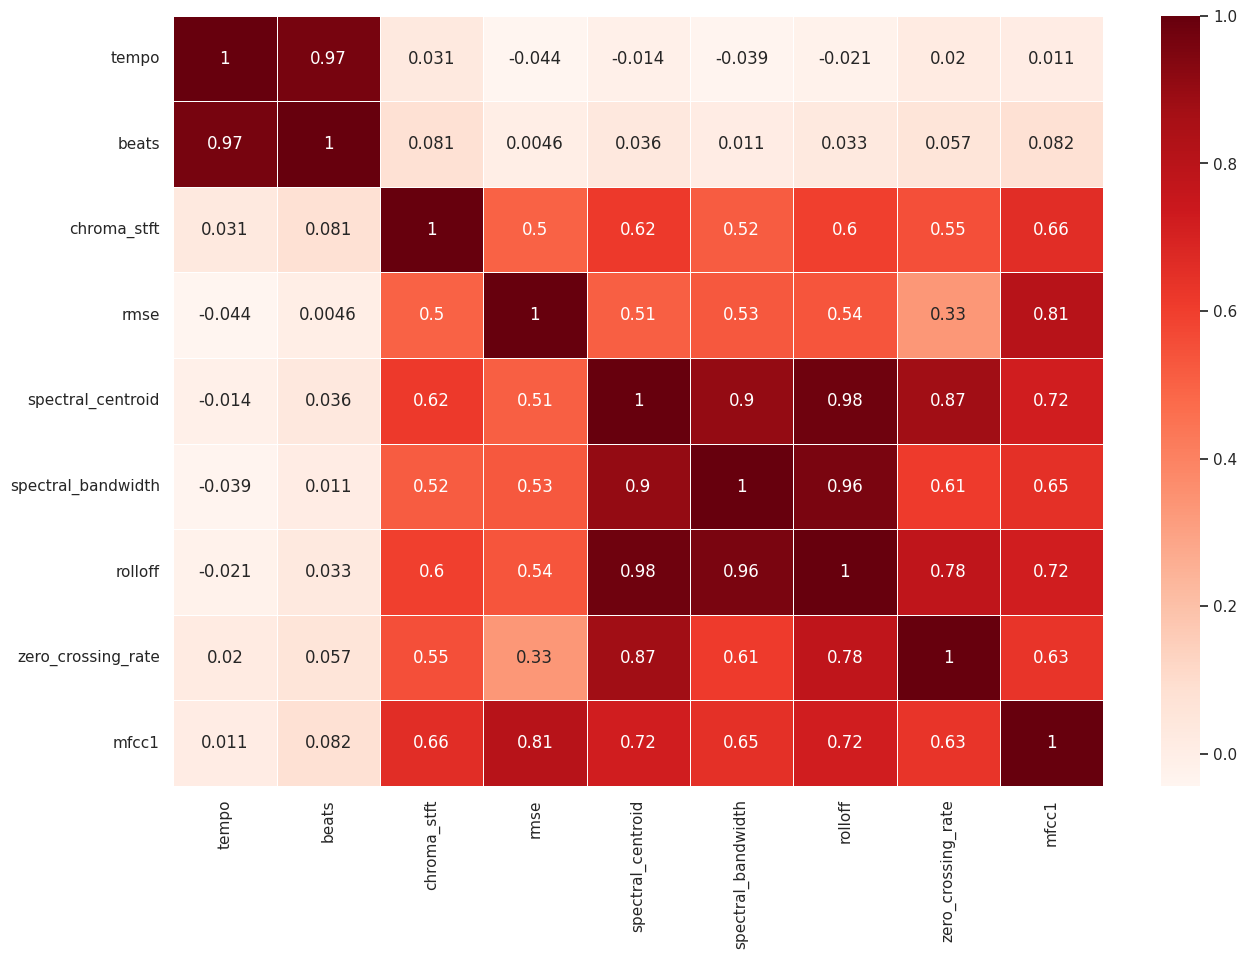

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(matrix,annot=True,linewidths=.5,cmap="Reds")